In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]
plotdata = {
        'batchsize': [],
        'loss': []
    }

In [3]:
train_x = np.linspace(-1, 1, 100)
train_y = 2 * train_x + np.random.randn(*train_x.shape) * 0.3

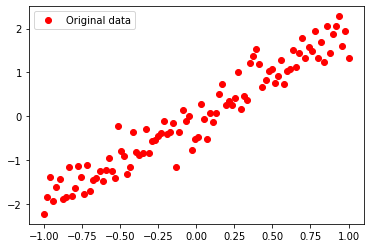

In [4]:
plt.plot(train_x, train_y, 'ro', label='Original data')
plt.legend()
plt.show()

In [5]:
x = tf.placeholder('float')
y = tf.placeholder('float')
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
z = tf.multiply(x, w) + b

In [6]:
cost = tf.reduce_mean(tf.square(y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()
training_epochs = 20
display_step = 2
saver = tf.train.Saver()
savedir = '/home/lx/learn/'

Epoch: 1 cost= 0.38840228 w= [1.1419376] b= [0.23361446]
Epoch: 3 cost= 0.12035397 w= [1.7506754] b= [0.06921323]
Epoch: 5 cost= 0.09946592 w= [1.9156047] b= [0.00708699]
Epoch: 7 cost= 0.0983292 w= [1.9583769] b= [-0.00930704]
Epoch: 9 cost= 0.09832523 w= [1.9694386] b= [-0.01355154]
Epoch: 11 cost= 0.09834362 w= [1.9722985] b= [-0.01464903]
Epoch: 13 cost= 0.09834967 w= [1.9730381] b= [-0.01493282]
Epoch: 15 cost= 0.098351315 w= [1.97323] b= [-0.01500655]
Epoch: 17 cost= 0.09835175 w= [1.9732792] b= [-0.01502535]
Epoch: 19 cost= 0.09835186 w= [1.9732924] b= [-0.01503045]
Finished!
cost= 0.09835188 w= [1.9732944] b= [-0.01503125]


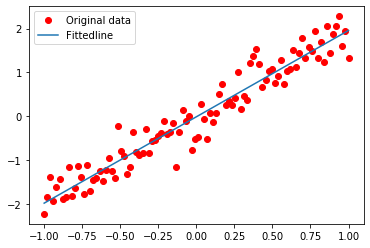

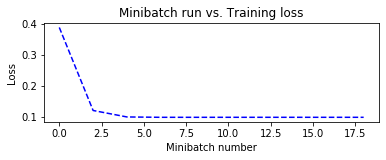

x=0.2, z= [0.37962765]


In [8]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x_item, y_item) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={x: x_item, y: y_item})
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={x: train_x, y: train_y})
            print(
                'Epoch:', epoch+1,
                'cost=', loss,
                'w=', sess.run(w),
                'b=', sess.run(b)
                
            )
            if not (loss == 'NA'):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print("Finished!")
    saver.save(sess, savedir+'linermodel.cpkt')
    print(
        'cost=', sess.run(cost, feed_dict={x: train_x, y: train_y}),
        'w=', sess.run(w),
        'b=', sess.run(b)
    )
    #图形显示
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label='Fittedline')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batchsize'], plotdata['avgloss'], 'b--')
    plt.xlabel("Minibatch number")
    plt.ylabel("Loss")
    plt.title("Minibatch run vs. Training loss")
    plt.show()
    
    print("x=0.2, z=", sess.run(z, feed_dict={x: 0.2}))
    

In [12]:
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(savedir+'linermodel.cpkt.meta')
    saver.restore(sess2, tf.train.latest_checkpoint(savedir))
    print('x=0.3, z=', sess2.run(z, feed_dict={x: 0.3}))

x=0.3, z= [0.5769571]
